In [1]:
import numpy as np
import ziff.ziff
import pkg_resources

In [2]:
shapes_path = pkg_resources.resource_filename('ziff', 'data/all_shapes_2020_02_20.npy')
shapes = np.load(shapes_path,allow_pickle=True)


In [101]:
shapes['T_data'] - shapes['T_model']


array([-0.00823818, -0.01895639, -0.00443161, ...,  0.01541519,
        0.02064041, -0.01565095])

In [148]:
# Normalization
fracdayccdq = shapes['fracday']*100000 + shapes['quadrants']*1000 + shapes['ccd']
fracdayccd = shapes['fracday']*100000 + shapes['ccd']*100
fracday = shapes['fracday']
from scipy.stats import binned_statistic
a = binned_statistic(fracday,shapes['T_data'],statistic='median',bins=N.unique(fracday))
median_T = a[0][a[2]-1]
print(fracdayccd)
print(shapes['T_data_normalized2'])
shapes['T_data_normalized2'] = shapes['T_data']/median_T
print(shapes['T_data_normalized2'])

shapes['T_model_normalized2'] = shapes['T_model']/median_T
print(shapes)

[20775501200 20775501200 20775501200 ... 53342600800 53342600800
 53342600800]
[0.99644452 0.98921272 1.00011688 ... 1.02297644 1.03300481 0.99577608]
[1.04134029 1.03378264 1.04517811 ... 1.06805565 1.07852594 1.03965666]
[(      0, 0.96450908, 0.97274727, 0.993424  , 1.00190915, 8367.04560849, 16.50880966, 11475.64589583, 3450.26208108, 0, 0, -0.00678231, 0.01466131, -0.02821343, 0.02045121, 1.04134029, 1.05023471, 12, 207755, 2)
 (      1, 0.95750905, 0.97646544, 0.98621411, 1.00573879, 3959.53072453, 17.32113071, 11490.47755661, 3465.37832316, 0, 0, -0.02259301, 0.0149425 , -0.02382384, 0.02184879, 1.03378264, 1.05424907, 12, 207755, 2)
 (      2, 0.96806374, 0.97249535, 0.99708522, 1.00164969, 9421.63020782, 16.37992486, 11474.75717617, 3565.78753371, 0, 0, -0.02870907, 0.01880149, -0.02340589, 0.0235896 , 1.04517811, 1.04996273, 12, 207755, 2)
 ...
 (2081763, 1.06624523, 1.05083004, 1.03410046, 1.01915001, 2300.08412746, 17.8799747 , 10948.42008536, -469.74627169, 0, 0, -0.079599

In [118]:
def get_datahist_ccd(ccd):
    flag = (shapes['instru_ZP_mag'] > 10 )*(shapes['instru_ZP_mag'] < 18)*(shapes['flag_data']==0)*(shapes['flag_model']==0)*(shapes['ccd']==ccd)
    new_shapes = shapes[flag]
    nbins = 20
    u,v = new_shapes['u'],new_shapes['v']
    bins_u = N.linspace(N.min(new_shapes['u'])*(1 - N.sign(N.min(new_shapes['u']))*0.01), N.max(new_shapes['u']) * (1 + N.sign(N.max(new_shapes['u']))*0.01), num=nbins + 1)
    bins_v = N.linspace(N.min(new_shapes['v'])*(1 - N.sign(N.min(new_shapes['v']))*0.01), N.max(new_shapes['v']) * (1 + N.sign(N.max(new_shapes['v']))*0.01), num=nbins + 1)
    histdata = binned_statistic_2d(u, v, new_shapes['T_data_normalized2'], statistic='median', bins=[bins_u,bins_v]).statistic
    return bins_u, bins_v, histdata

def get_datahist_full(nbins=20):
    flag = (shapes['instru_ZP_mag'] > 10 )*(shapes['instru_ZP_mag'] < 18)*(shapes['flag_data']==0)*(shapes['flag_model']==0)
    new_shapes = shapes[flag]
    u,v = new_shapes['u'],new_shapes['v']
    bins_u = N.linspace(N.min(new_shapes['u'])*(1 - N.sign(N.min(new_shapes['u']))*0.01), N.max(new_shapes['u']) * (1 + N.sign(N.max(new_shapes['u']))*0.01), num=nbins + 1)
    bins_v = N.linspace(N.min(new_shapes['v'])*(1 - N.sign(N.min(new_shapes['v']))*0.01), N.max(new_shapes['v']) * (1 + N.sign(N.max(new_shapes['v']))*0.01), num=nbins + 1)
    histdata = binned_statistic_2d(u, v, new_shapes['T_data_normalized2'], statistic='median', bins=[bins_u,bins_v]).statistic
    return bins_u, bins_v, histdata

def get_modelhist_ccd(ccd):
    flag = (shapes['instru_ZP_mag'] > 10 )*(shapes['instru_ZP_mag'] < 18)*(shapes['flag_data']==0)*(shapes['flag_model']==0)*(shapes['ccd']==ccd)
    new_shapes = shapes[flag]
    nbins = 20
    bins_u = N.linspace(N.min(new_shapes['u'])*(1 - N.sign(N.min(new_shapes['u']))*0.01), N.max(new_shapes['u']) * (1 + N.sign(N.max(new_shapes['u']))*0.01), num=nbins + 1)
    bins_v = N.linspace(N.min(new_shapes['v'])*(1 - N.sign(N.min(new_shapes['v']))*0.01), N.max(new_shapes['v']) * (1 + N.sign(N.max(new_shapes['v']))*0.01), num=nbins + 1)
    u,v = new_shapes['u'],new_shapes['v']
    histdata = binned_statistic_2d(u, v, new_shapes['T_model_normalized2'], statistic='median', bins=[bins_u,bins_v]).statistic
    return bins_u, bins_v, histdata

def get_reshist_ccd(ccd):
    flag = (shapes['instru_ZP_mag'] > 10 )*(shapes['instru_ZP_mag'] < 18)*(shapes['flag_data']==0)*(shapes['flag_model']==0)*(shapes['ccd']==ccd)
    new_shapes = shapes[flag]
    nbins = 20
    bins_u = N.linspace(N.min(new_shapes['u'])*(1 - N.sign(N.min(new_shapes['u']))*0.01), N.max(new_shapes['u']) * (1 + N.sign(N.max(new_shapes['u']))*0.01), num=nbins + 1)
    bins_v = N.linspace(N.min(new_shapes['v'])*(1 - N.sign(N.min(new_shapes['v']))*0.01), N.max(new_shapes['v']) * (1 + N.sign(N.max(new_shapes['v']))*0.01), num=nbins + 1)
    u,v = new_shapes['u'],new_shapes['v']
    histdata = binned_statistic_2d(u, v, (new_shapes['T_model']-new_shapes['T_data'])/new_shapes['T_data'], statistic='median', bins=[bins_u,bins_v]).statistic
    return bins_u, bins_v, histdata


<IPython.core.display.Javascript object>


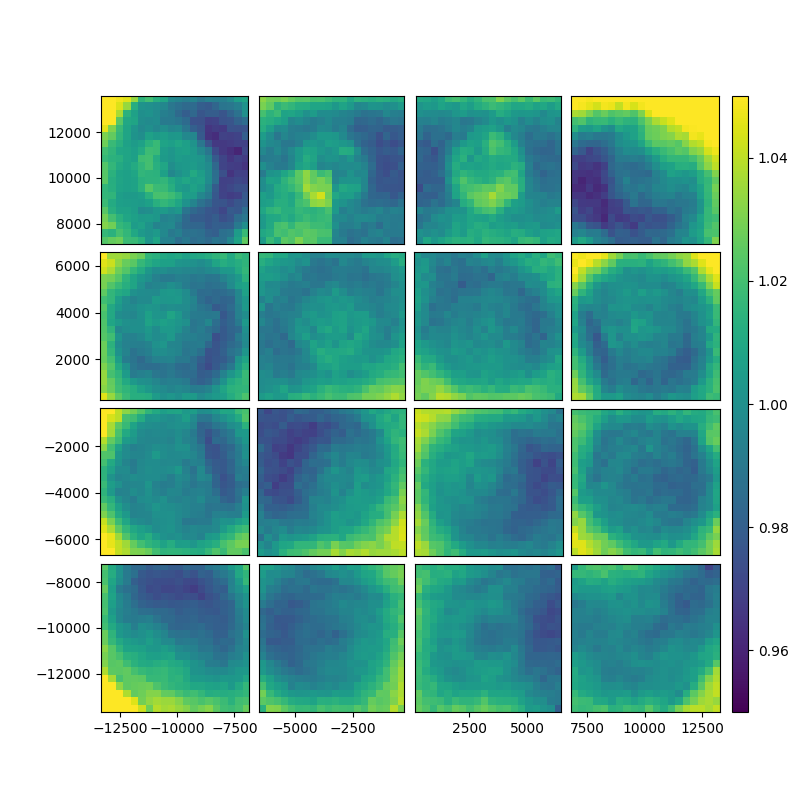

<IPython.core.display.Javascript object>


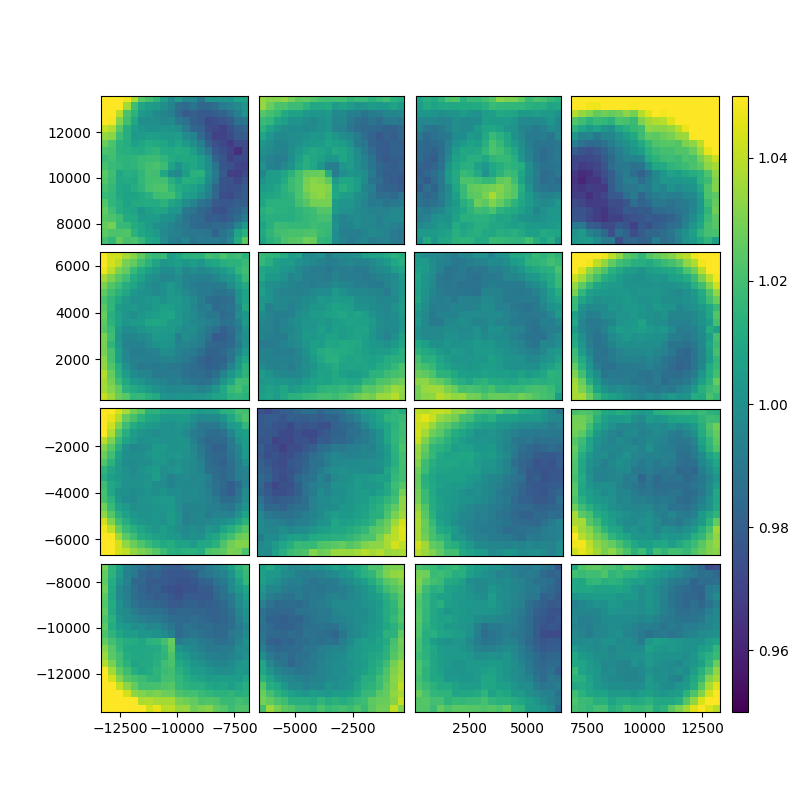

<IPython.core.display.Javascript object>


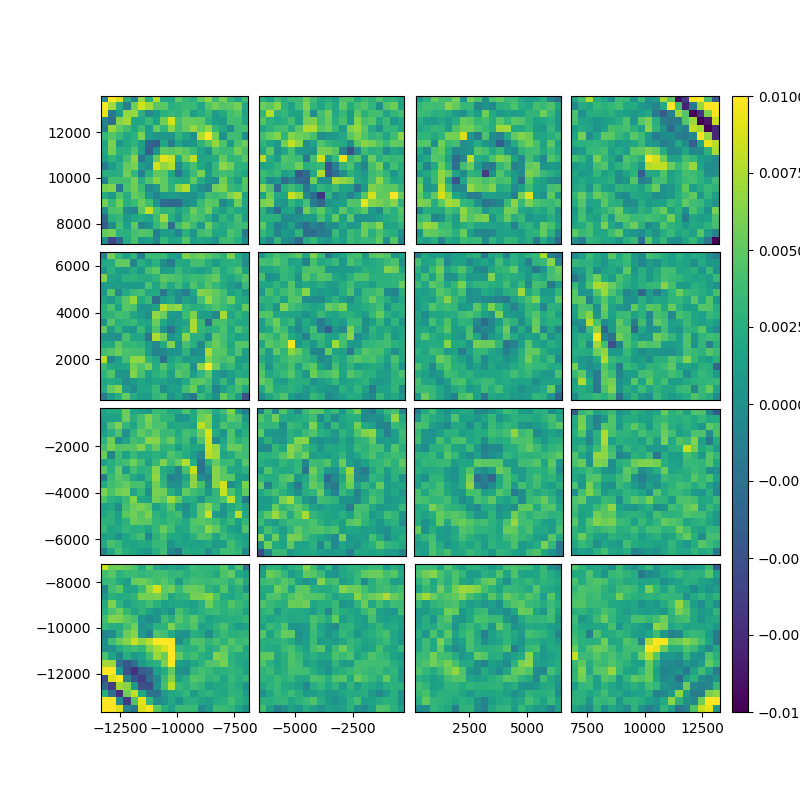

'    \nfig, ax = P.subplots(4,4,figsize=(8,8))\nfor i in range(4):\n    for j in range(4):\n        bins_u, bins_v, hist = hm[i+4*j]\n        ax[i,j].imshow(hist,vmin=0.95,vmax=1.05,extent=(bins_u[0],bins_u[-1],bins_v[0],bins_v[-1]))\n'

In [146]:
#ccdi = N.array([13,14,15,16,9,10,11,12,5,6,7,8,1,2,3,4])
ccdi = N.array([13,9,5,1,14,10,6,2,15,11,7,3,16,12,8,4])
hd = [get_datahist_ccd(ccd) for ccd in ccdi]
hm = [get_modelhist_ccd(ccd) for ccd in ccdi]
hr = [get_reshist_ccd(ccd) for ccd in ccdi]

from matplotlib.gridspec import GridSpec
#fig, ax = P.subplots(4,4,figsize=(8,8))
%matplotlib notebook

def plot_hist(h,vmin=0.95,vmax=1.05):
    fig = P.figure(figsize=(8,8))
    gs = GridSpec(4, 4, figure=fig,wspace=0.05,hspace=0.05)
    for i in range(4):
        for j in range(4):
            ax = fig.add_subplot(gs[i,j])
            bins_u, bins_v, hist = h[i+4*j]
            im = ax.imshow(hist.T,vmin=vmin,vmax=vmax,extent=(bins_u[0],bins_u[-1],bins_v[0],bins_v[-1]),origin='lower')
            if i != 3:
                ax.get_xaxis().set_visible(False)
            if j!=0:
                ax.get_yaxis().set_visible(False)
    fig.subplots_adjust(right=0.9)
    cbar_ax = fig.add_axes([0.915, 0.11, 0.02, 0.77])
    fig.colorbar(im, cax=cbar_ax)
    return fig
fig = plot_hist(hd)
fig.savefig('/Users/graziani/temp/data_2020_02_20.pdf')
fig = plot_hist(hm)
fig.savefig('/Users/graziani/temp/model_2020_02_20.pdf')
fig = plot_hist(hr,vmin=-0.01,vmax=0.01)
fig.savefig('/Users/graziani/temp/res_2020_02_20.pdf')

'''    
fig, ax = P.subplots(4,4,figsize=(8,8))
for i in range(4):
    for j in range(4):
        bins_u, bins_v, hist = hm[i+4*j]
        ax[i,j].imshow(hist,vmin=0.95,vmax=1.05,extent=(bins_u[0],bins_u[-1],bins_v[0],bins_v[-1]))
'''

<IPython.core.display.Javascript object>


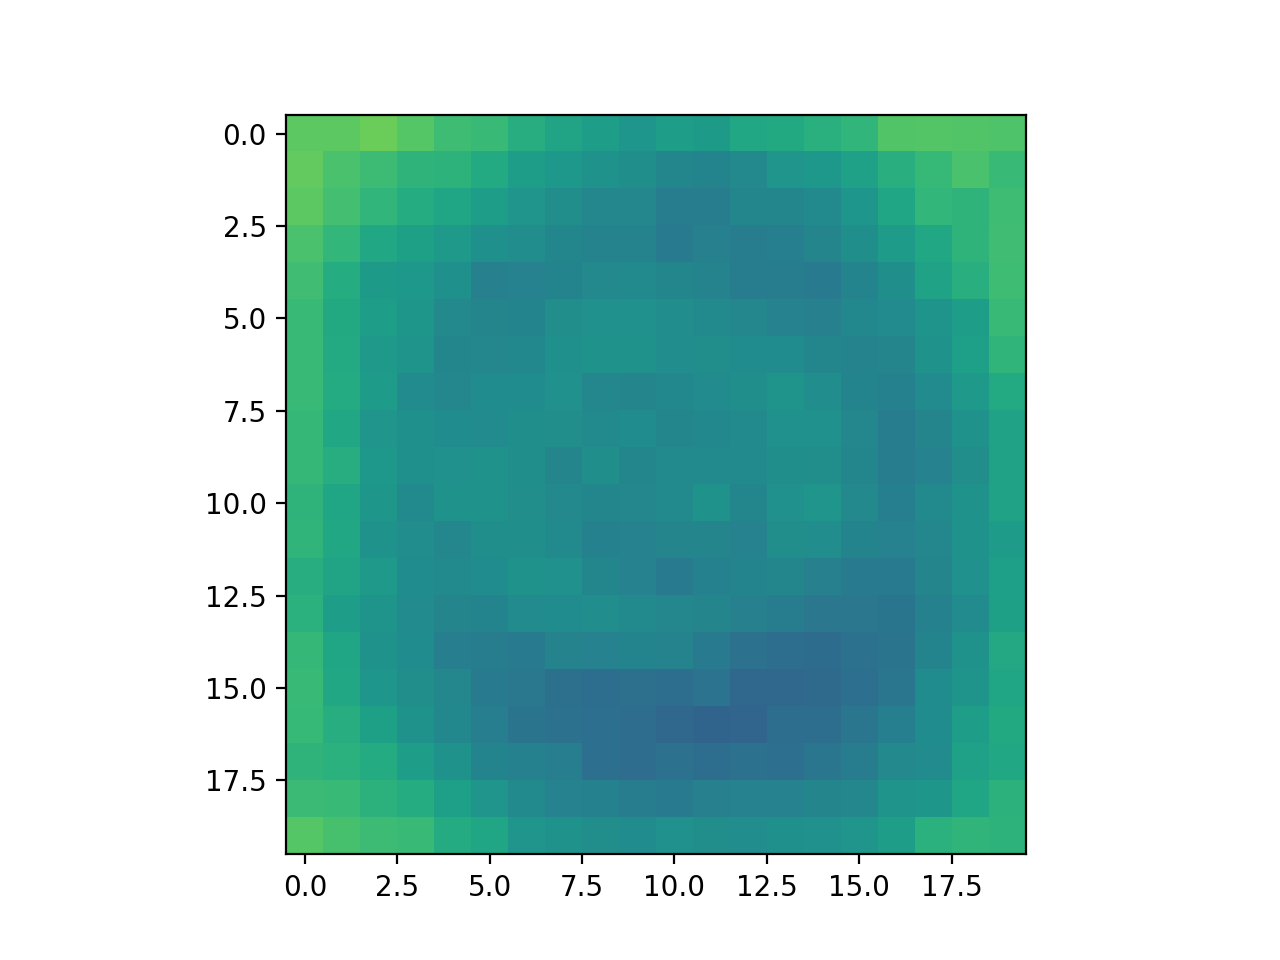

In [64]:
fig, ax = P.subplots()
ax.imshow(N.median(hd,axis=0),vmin=0.95,vmax=1.05)

# INTERPOLATION

In [10]:
from scipy.interpolate import interp2d,griddata,LinearNDInterpolator,CloughTocher2DInterpolator
interp = LinearNDInterpolator(N.asarray([shapes['u'],shapes['v']]).T, shapes['T_data_normalized2'])



In [119]:
bins_u,bins_v,hist = get_datahist_full(nbins=150)

In [137]:
hist[N.isnan((hist))] = 1

In [138]:
from scipy.interpolate import RegularGridInterpolator
interp = RegularGridInterpolator((bins_u[0:-1],bins_v[0:-1]), hist,bounds_error=False,fill_value=1)



In [139]:
interp([790,1375])
interp([-8500,6800])

array([1.])

<IPython.core.display.Javascript object>


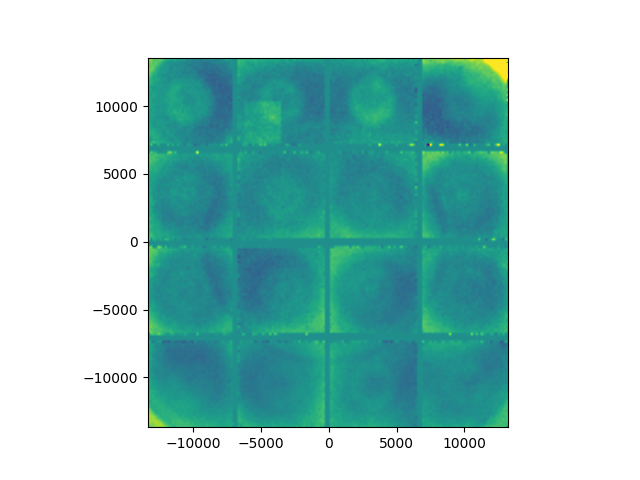

In [140]:
umin,umax,vmin,vmax = N.min(shapes['u']),N.max(shapes['u']),N.min(shapes['v']),N.max(shapes['v'])
u,v = N.mgrid[umin:umax:10,vmin:vmax:10]
i = interp(N.asarray([u.ravel(),v.ravel()]).T).reshape(u.shape)

fig, ax = P.subplots()
ax.imshow(i.T,origin='lower',vmin=0.9,vmax=1.1,extent = (bins_u[0],bins_u[-1],bins_v[0],bins_v[-1]))

In [141]:
# Saving
import pickle
with open('interpolator.pkl', 'wb') as f:
    pickle.dump(interp, f)